# Import library

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, LSTM
from matplotlib.animation import FuncAnimation
from math import sqrt
from sklearn.metrics import mean_squared_error

In [62]:
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

# 1. Read data

In [63]:
VNIndex = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/AppWeb/Data/VNI.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])
VNItest = pd.read_csv('https://raw.githubusercontent.com/grassnhi/AI_ML_DL/main/CSVFile/VNItest.csv',
                        parse_dates=['Date'], index_col='Date').filter(['Price'])

VNIndex["Price"] = pd.to_numeric(VNIndex["Price"].apply(lambda x: x.replace(",", "")))
VNItest["Price"] = VNItest["Price"].str.replace(',', '').astype(float)

VNIndex = VNIndex.iloc[::-1]
VNItest = VNItest.iloc[::-1]

# 2. Visualize

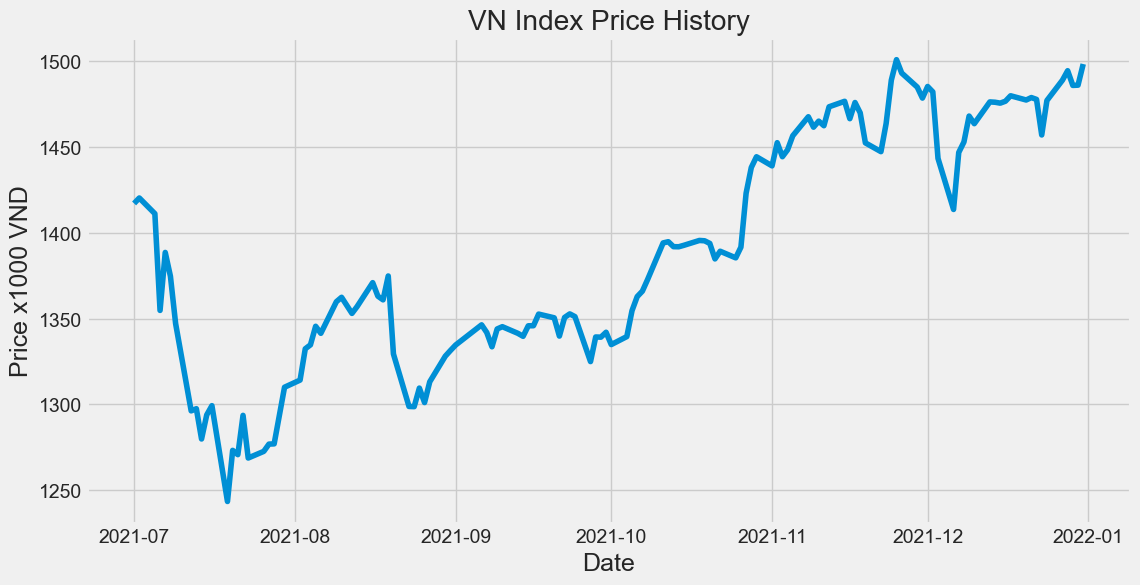

In [64]:
plt.figure(figsize=(12,6))
plt.title('VN Index Price History')
plt.plot(VNIndex['Price'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price x1000 VND', fontsize=18)
plt.show()

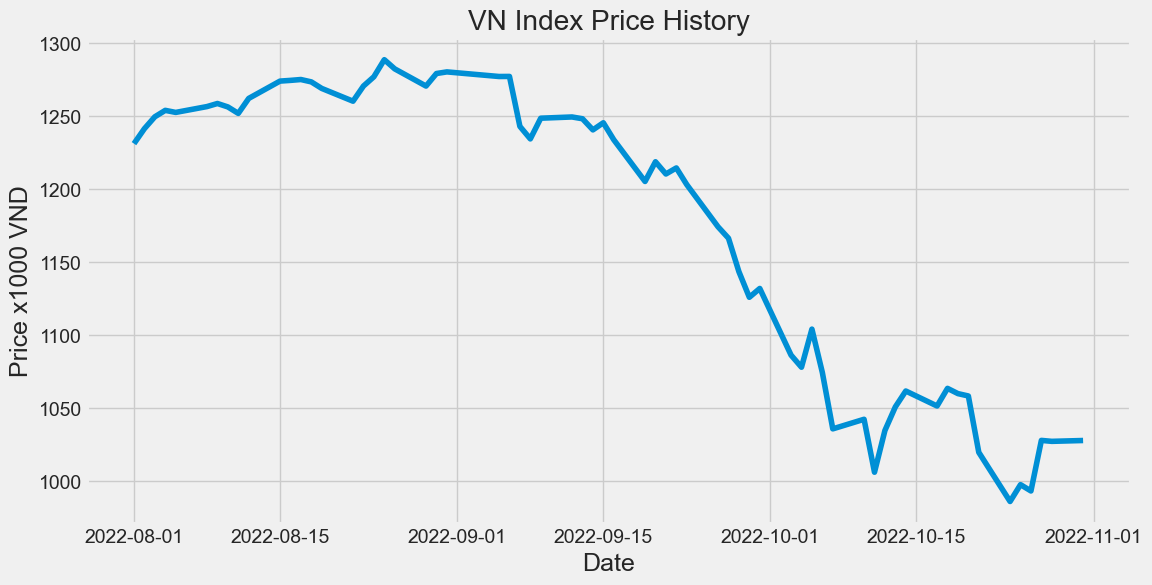

In [65]:
plt.figure(figsize=(12,6))
plt.title('VN Index Price History')
plt.plot(VNItest['Price'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price x1000 VND', fontsize=18)
plt.show()

# 3. Preprocess data

In [66]:
training_data_len = int(np.ceil(len(VNIndex)))
training_data_len

130

In [67]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(VNIndex)
scaled_test = scaler.fit_transform(VNItest)
#scaled_data

In [68]:
time_step = 5

In [69]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(time_step, len(train_data)):
    x_train.append(train_data[i-time_step:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(125, 5, 1)

# 4. Build model

In [70]:
from datetime import datetime

In [71]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(128, input_shape= (x_train.shape[1], 1)))
model.add(Dense(8))
model.add(Dense(1))

In [72]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 5, 256)            264192    
                                                                 
 lstm_9 (LSTM)               (None, 128)               197120    
                                                                 
 dense_8 (Dense)             (None, 8)                 1032      
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 462,353
Trainable params: 462,353
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# 5. Train model

In [74]:
history = model.fit(x_train, y_train, batch_size = 2, shuffle = False, epochs = 500)

Epoch 1/500
63/63 [==============================] - 7s 11ms/step - loss: 0.0811
Epoch 2/500
63/63 [==============================] - 1s 10ms/step - loss: 0.0180
Epoch 3/500
63/63 [==============================] - 1s 10ms/step - loss: 0.0148
Epoch 4/500
63/63 [==============================] - 1s 10ms/step - loss: 0.0145
Epoch 5/500
63/63 [==============================] - 1s 10ms/step - loss: 0.0143
Epoch 6/500
63/63 [==============================] - 1s 10ms/step - loss: 0.0142
Epoch 7/500
63/63 [==============================] - 1s 10ms/step - loss: 0.0141
Epoch 8/500
63/63 [==============================] - 1s 9ms/step - loss: 0.0141
Epoch 9/500
63/63 [==============================] - 1s 9ms/step - loss: 0.0140
Epoch 10/500
63/63 [==============================] - 1s 9ms/step - loss: 0.0139
Epoch 11/500
63/63 [==============================] - 1s 11ms/step - loss: 0.0139
Epoch 12/500
63/63 [==============================] - 1s 9ms/step - loss: 0.0138
Epoch 13/500
63/63 [=========

In [75]:
test_data = scaled_test[0:int(len(VNItest)), :]
x_test = []

for i in range(time_step,len(test_data)):
  x_test.append(test_data[i-time_step:i,0])

x_test= np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)
print(test_data.shape)

(59, 5, 1)
(64, 1)


In [85]:
predictions = model.predict(x_test)
predictions.shape

2/2 [==============================] - 0s 11ms/step


(59, 1)

In [86]:
predictions = scaler.inverse_transform(predictions)

In [87]:
rmse = sqrt(mean_squared_error(VNItest, predictions))
print('Train RMSE - LSTM: %.3f' % mean_squared_error(y_train, model.predict(x_train)))
print('Test RMSE - LSTM: %.3f' % rmse)

ValueError: Found input variables with inconsistent numbers of samples: [64, 59]

In [82]:
VNItest['Predictions'] = predictions
VNItest

,Price,Predictions
Date,,
2022-08-01,1231.35,3.712765
2022-08-02,1241.62,3.712700
2022-08-03,1249.76,3.712648
2022-08-04,1254.15,3.712621
2022-08-05,1252.74,3.712630
...,...,...
2022-10-25,997.70,3.714310
2022-10-26,993.36,3.714339
2022-10-27,1028.01,3.714104


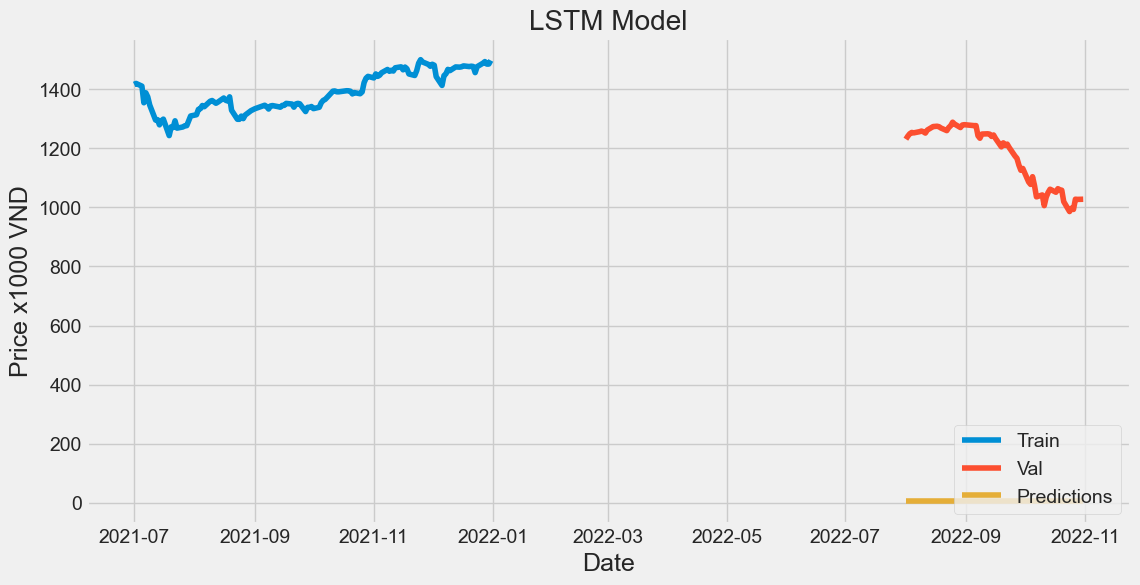

In [84]:
plt.figure(figsize=(12,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price x1000 VND', fontsize=18)
plt.plot(VNIndex['Price'])
plt.plot(VNItest[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()